In [1]:
from rdkit import Chem
import seaborn as sns
import pandas as pd
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors as rdescriptors
import gzip

In [2]:
labels = ['Mol weight', 'HBA', 'HBD', 'logP']
fs = [Descriptors.MolWt, Descriptors.NumHAcceptors, Descriptors.NumHDonors, Descriptors.MolLogP]
limits = [500, 10, 5, 5]
def lip(m):
    return sum([f(m) > l for f, l, lab in zip(fs, limits, labels)]) < 2

In [3]:
supp = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = pd.DataFrame({'mol': mol, 'source': 'DrugBank'} for mol in Chem.SDMolSupplier("../data/drugbank.sdf") if mol)
drugbank

[13:26:30] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:26:30] ERROR: Could not sanitize molecule ending on line 20009
[13:26:30] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[13:26:30] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:26:30] ERROR: Could not sanitize molecule ending on line 250947
[13:26:30] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:26:30] Explicit valence for atom # 17 O, 3, is greater than permitted
[13:26:30] ERROR: Could not sanitize molecule ending on line 258130
[13:26:30] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[13:26:30] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:26:30] ERROR: Could not sanitize molecule ending on line 261581
[13:26:30] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:26:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[13:26:30] ERROR: Coul

[13:26:31] Explicit valence for atom # 4 F, 2, is greater than permitted
[13:26:31] ERROR: Could not sanitize molecule ending on line 645068
[13:26:31] ERROR: Explicit valence for atom # 4 F, 2, is greater than permitted
[13:26:31] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
[13:26:31] ERROR: Could not sanitize molecule ending on line 659994
[13:26:31] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
[13:26:31] Explicit valence for atom # 0 Be, 3, is greater than permitted
[13:26:31] ERROR: Could not sanitize molecule ending on line 995692
[13:26:31] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
[13:26:32] Explicit valence for atom # 0 C greater than permitted
[13:26:32] ERROR: Could not sanitize molecule ending on line 1151592
[13:26:32] ERROR: Explicit valence for atom # 0 C greater than permitted


,mol,source
0,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank
1,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank
2,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank
3,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank
4,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank
...,...,...
7112,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,DrugBank
7113,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,DrugBank
7114,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,DrugBank
7115,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,DrugBank


In [4]:
with gzip.open('../data/rock1/actives_final.sdf.gz', 'r') as sdf:
    suppl = Chem.ForwardSDMolSupplier(sdf)
    active = pd.DataFrame({'mol': mol, 'source': 'dude_active'} for mol in suppl if mol)
active

,mol,source
0,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,dude_active
1,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,dude_active
2,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,dude_active
3,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,dude_active
4,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,dude_active
...,...,...
198,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_active
199,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_active
200,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_active
201,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_active


In [5]:
with gzip.open('../data/rock1/decoys_final.sdf.gz', 'r') as sdf:
    suppl = Chem.ForwardSDMolSupplier(sdf)
    decoy = pd.DataFrame({'mol': mol, 'source': 'dude_decoy'} for mol in suppl if mol)
decoy

,mol,source
0,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_decoy
1,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_decoy
2,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_decoy
3,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_decoy
4,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_decoy
...,...,...
6372,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy
6373,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy
6374,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy
6375,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy


In [6]:
active

,mol,source
0,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,dude_active
1,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,dude_active
2,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,dude_active
3,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,dude_active
4,<rdkit.Chem.rdchem.Mol object at 0x0000020953F...,dude_active
...,...,...
198,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_active
199,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_active
200,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_active
201,<rdkit.Chem.rdchem.Mol object at 0x0000020947F...,dude_active


In [7]:
joint_df = pd.concat((drugbank, active, decoy), ignore_index=True)
joint_df

,mol,source
0,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank
1,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank
2,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank
3,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank
4,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank
...,...,...
13692,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy
13693,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy
13694,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy
13695,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy


In [8]:
joint_df['lipinski'] = joint_df['mol'].apply(lambda x: lip(x))
joint_df

,mol,source,lipinski
0,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,False
1,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,False
2,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,False
3,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,False
4,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,False
...,...,...,...
13692,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True
13693,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True
13694,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True
13695,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True


In [9]:
joint_df = joint_df[joint_df['lipinski']==True]

In [10]:
joint_df['mw'] = joint_df['mol'].apply(lambda x: rdescriptors.CalcExactMolWt(x))
joint_df

C:\Users\install\AppData\Local\Temp\ipykernel_4252\4130241394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_df['mw'] = joint_df['mol'].apply(lambda x: rdescriptors.CalcExactMolWt(x))


,mol,source,lipinski,mw
7,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,247.024574
9,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,445.170981
10,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,155.069477
11,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,399.144515
12,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,88.016044
...,...,...,...,...
13692,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,399.163852
13693,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,380.254383
13694,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717
13695,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717


In [11]:
joint_df['hba'] = joint_df['mol'].apply(lambda x: rdescriptors.CalcNumLipinskiHBA(x))
joint_df

C:\Users\install\AppData\Local\Temp\ipykernel_4252\168533479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_df['hba'] = joint_df['mol'].apply(lambda x: rdescriptors.CalcNumLipinskiHBA(x))


,mol,source,lipinski,mw,hba
7,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,247.024574,7
9,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,445.170981,13
10,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,155.069477,5
11,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,399.144515,11
12,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,88.016044,3
...,...,...,...,...,...
13692,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,399.163852,7
13693,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,380.254383,7
13694,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7
13695,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7


In [12]:
joint_df['hbd'] = joint_df['mol'].apply(lambda x: rdescriptors.CalcNumLipinskiHBD(x))
joint_df

C:\Users\install\AppData\Local\Temp\ipykernel_4252\3473843572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_df['hbd'] = joint_df['mol'].apply(lambda x: rdescriptors.CalcNumLipinskiHBD(x))


,mol,source,lipinski,mw,hba,hbd
7,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,247.024574,7,3
9,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,445.170981,13,9
10,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,155.069477,5,4
11,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,399.144515,11,7
12,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,88.016044,3,1
...,...,...,...,...,...,...
13692,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,399.163852,7,4
13693,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,380.254383,7,4
13694,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7,4
13695,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7,4


In [13]:
joint_df['tpsa'] = joint_df['mol'].apply(lambda x: rdescriptors.CalcTPSA(x))
joint_df

C:\Users\install\AppData\Local\Temp\ipykernel_4252\1083037554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_df['tpsa'] = joint_df['mol'].apply(lambda x: rdescriptors.CalcTPSA(x))


,mol,source,lipinski,mw,hba,hbd,tpsa
7,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,247.024574,7,3,116.95
9,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,445.170981,13,9,211.56
10,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,155.069477,5,4,92.00
11,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,399.144515,11,7,182.63
12,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,88.016044,3,1,54.37
...,...,...,...,...,...,...,...
13692,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,399.163852,7,4,100.84
13693,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,380.254383,7,4,84.26
13694,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7,4,83.90
13695,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7,4,83.90


In [14]:
joint_df['logp'] = joint_df['mol'].apply(lambda x: Descriptors.MolLogP(x))
joint_df

C:\Users\install\AppData\Local\Temp\ipykernel_4252\165105047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_df['logp'] = joint_df['mol'].apply(lambda x: Descriptors.MolLogP(x))


,mol,source,lipinski,mw,hba,hbd,tpsa,logp
7,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,247.024574,7,3,116.95,0.51742
9,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,445.170981,13,9,211.56,-0.28200
10,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,155.069477,5,4,92.00,-0.63590
11,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,399.144515,11,7,182.63,-1.92220
12,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,88.016044,3,1,54.37,-0.34000
...,...,...,...,...,...,...,...,...
13692,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,399.163852,7,4,100.84,2.09972
13693,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,380.254383,7,4,84.26,1.30200
13694,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7,4,83.90,1.18160
13695,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7,4,83.90,1.12270


In [15]:
joint_df['rings'] = joint_df['mol'].apply(lambda x: len(Chem.GetSSSR(x)))
joint_df

C:\Users\install\AppData\Local\Temp\ipykernel_4252\2770973719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_df['rings'] = joint_df['mol'].apply(lambda x: len(Chem.GetSSSR(x)))


,mol,source,lipinski,mw,hba,hbd,tpsa,logp,rings
7,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,247.024574,7,3,116.95,0.51742,1
9,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,445.170981,13,9,211.56,-0.28200,3
10,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,155.069477,5,4,92.00,-0.63590,1
11,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,399.144515,11,7,182.63,-1.92220,3
12,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,88.016044,3,1,54.37,-0.34000,0
...,...,...,...,...,...,...,...,...,...
13692,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,399.163852,7,4,100.84,2.09972,2
13693,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,380.254383,7,4,84.26,1.30200,2
13694,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7,4,83.90,1.18160,2
13695,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7,4,83.90,1.12270,2


In [16]:
joint_df['rb'] = joint_df['mol'].apply(lambda x: rdescriptors.CalcNumRotatableBonds(x))
joint_df

C:\Users\install\AppData\Local\Temp\ipykernel_4252\282746173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_df['rb'] = joint_df['mol'].apply(lambda x: rdescriptors.CalcNumRotatableBonds(x))


,mol,source,lipinski,mw,hba,hbd,tpsa,logp,rings,rb
7,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,247.024574,7,3,116.95,0.51742,1,4
9,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,445.170981,13,9,211.56,-0.28200,3,9
10,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,155.069477,5,4,92.00,-0.63590,1,3
11,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,399.144515,11,7,182.63,-1.92220,3,7
12,<rdkit.Chem.rdchem.Mol object at 0x0000020947E...,DrugBank,True,88.016044,3,1,54.37,-0.34000,0,1
...,...,...,...,...,...,...,...,...,...,...
13692,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,399.163852,7,4,100.84,2.09972,2,9
13693,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,380.254383,7,4,84.26,1.30200,2,8
13694,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7,4,83.90,1.18160,2,7
13695,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,dude_decoy,True,377.254717,7,4,83.90,1.12270,2,6


<Axes: >

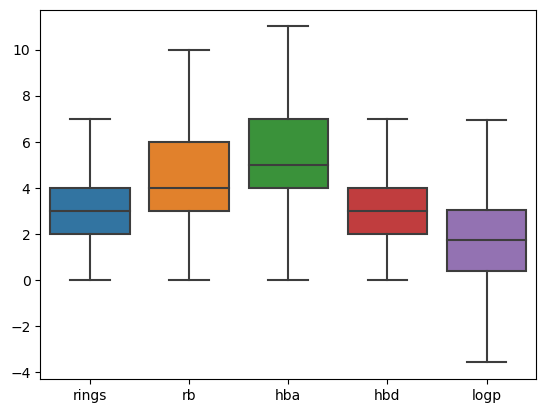

In [17]:
sns.boxplot(data=joint_df[['rings', 'rb', 'hba', 'hbd', 'logp']], showfliers=False)

In [18]:
melted_df = pd.melt(joint_df, id_vars=['source'], value_vars=['rings', 'rb', 'hba', 'hbd', 'logp'])
melted_df

,source,variable,value
0,DrugBank,rings,1.00000
1,DrugBank,rings,3.00000
2,DrugBank,rings,1.00000
3,DrugBank,rings,3.00000
4,DrugBank,rings,0.00000
...,...,...,...
64650,dude_decoy,logp,2.09972
64651,dude_decoy,logp,1.30200
64652,dude_decoy,logp,1.18160
64653,dude_decoy,logp,1.12270


<Axes: xlabel='variable', ylabel='value'>

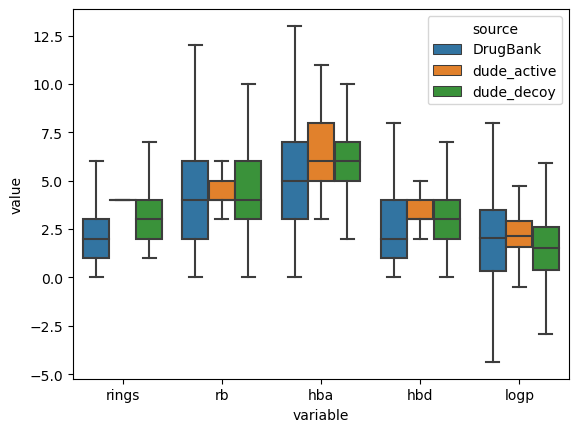

In [19]:
sns.boxplot(y='value', x='variable', hue='source', data=melted_df, showfliers=False)

In [20]:
melted_df2 = pd.melt(joint_df, id_vars=['source'], value_vars=['mw','tpsa'])
melted_df2

,source,variable,value
0,DrugBank,mw,247.024574
1,DrugBank,mw,445.170981
2,DrugBank,mw,155.069477
3,DrugBank,mw,399.144515
4,DrugBank,mw,88.016044
...,...,...,...
25857,dude_decoy,tpsa,100.840000
25858,dude_decoy,tpsa,84.260000
25859,dude_decoy,tpsa,83.900000
25860,dude_decoy,tpsa,83.900000


<Axes: xlabel='variable', ylabel='value'>

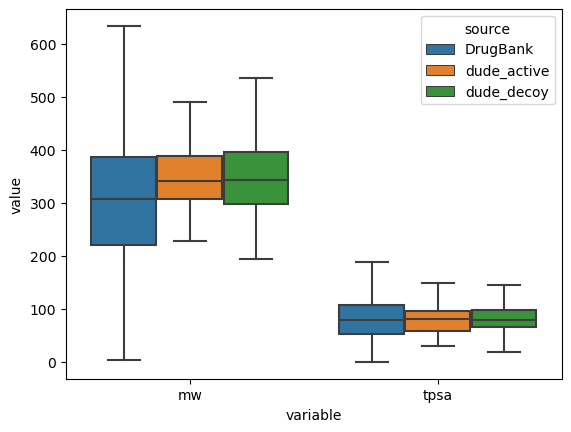

In [21]:
sns.boxplot(y='value', x='variable', hue='source', data=melted_df2, showfliers=False)

<Axes: xlabel='variable', ylabel='value'>

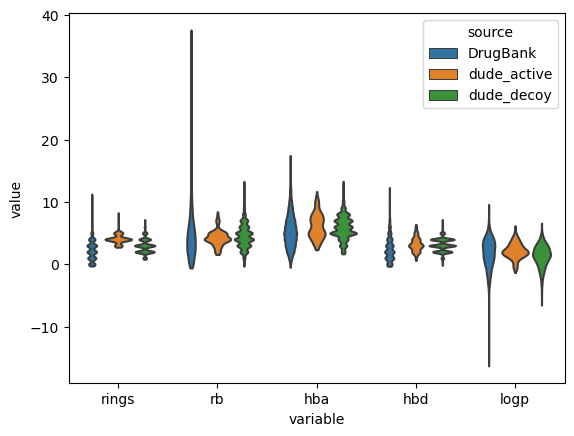

In [22]:
sns.violinplot(y='value', x='variable', hue='source', data=melted_df, inner=None, cut=True)

In [25]:
joint_df.corr()

C:\Users\install\AppData\Local\Temp\ipykernel_4252\3509410429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  joint_df.corr()


,lipinski,mw,hba,hbd,tpsa,logp,rings,rb
lipinski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mw,NaN,1.000000,0.574820,0.148116,0.411930,0.318501,0.647477,0.510053
hba,NaN,0.574820,1.000000,0.492723,0.915846,-0.320178,0.267216,0.375246
hbd,NaN,0.148116,0.492723,1.000000,0.635706,-0.460872,-0.063118,0.194812
tpsa,NaN,0.411930,0.915846,0.635706,1.000000,-0.384946,0.073347,0.305045
logp,NaN,0.318501,-0.320178,-0.460872,-0.384946,1.000000,0.338007,0.139848
rings,NaN,0.647477,0.267216,-0.063118,0.073347,0.338007,1.000000,-0.038715
rb,NaN,0.510053,0.375246,0.194812,0.305045,0.139848,-0.038715,1.000000


C:\Users\install\AppData\Local\Temp\ipykernel_4252\2527504069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(joint_df.corr(), annot=True, cmap='coolwarm')


<Axes: >

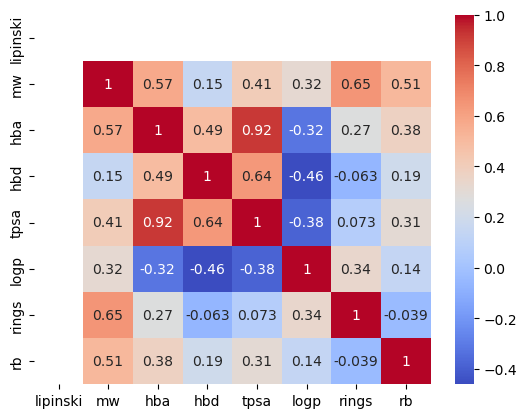

In [27]:
sns.heatmap(joint_df.corr(), annot=True, cmap='coolwarm')

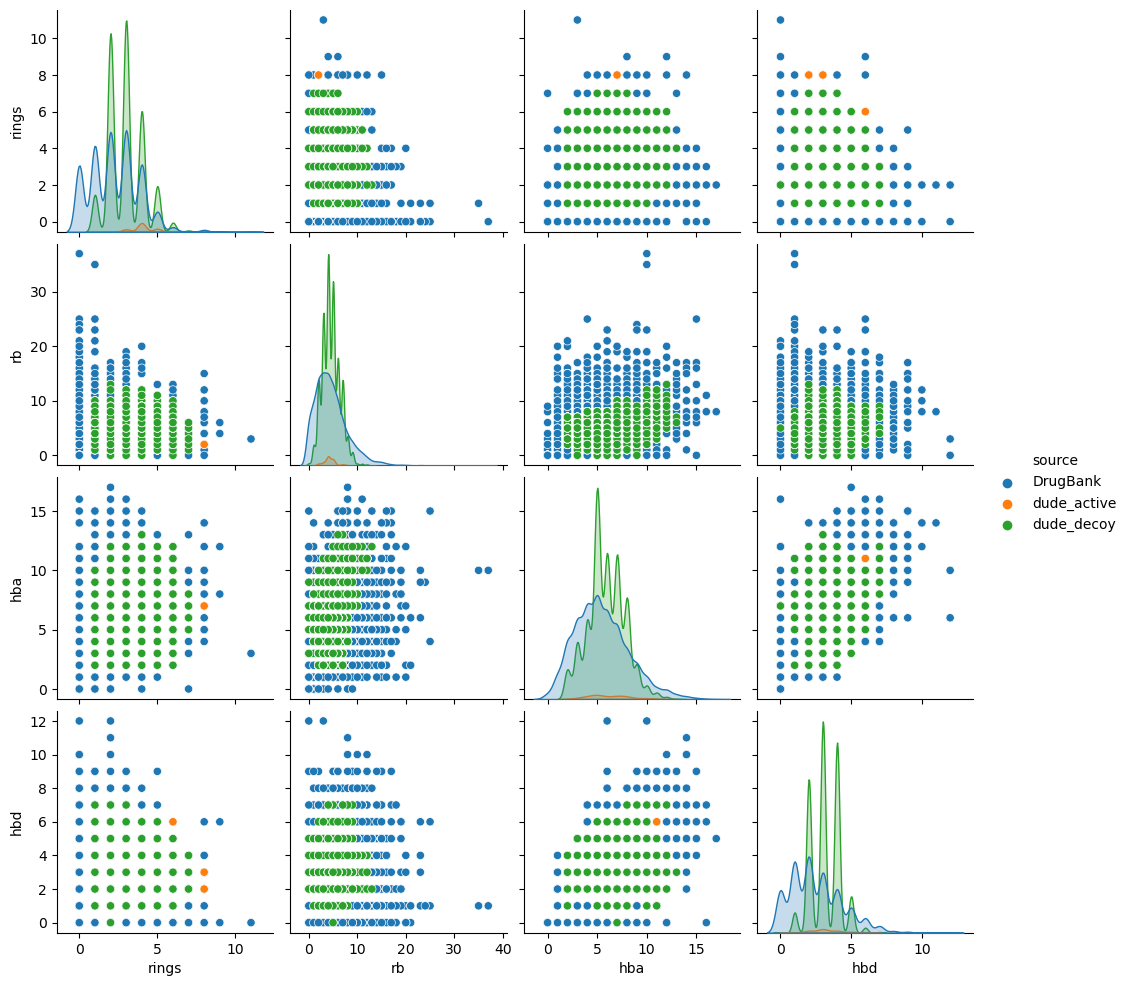

In [23]:
sns.pairplot(data=joint_df[['source', 'rings', 'rb', 'hba', 'hbd']], hue='source')